# 코로나 이후 중국 항생지수가 오르면.. 삼성 주가도 오른다!!
 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
conda install -c conda-forge scikit-plot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install yfinance
!pip install investpy
!pip install pykrx
!pip install seaborn
!pip install workalendar
!pip install --upgrade finance-datareader

You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl

Processing c:\users\user\downloads\ta_lib-0.4.19-cp38-cp38-win_amd64.whl
TA-Lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install -U finance-datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 크롤링 start_date, end_date
start_date='2019-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date='2020-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

# 크롤링 start_date, end_date
_start_date='2020-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
_end_date='2021-02-10'

In [8]:
# 데이터 수집기간 입력
# yahoo finance 양식, ex) yyyy-mm-dd
#start_date = '2018-01-01'
#end_date = '2020-10-13'

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]


__start_date = _start_date[8:] + '/' + _start_date[5:7] + '/' + _start_date[:4]
__end_date = _end_date[8:] + '/' + _end_date[5:7] + '/' + _end_date[:4]

# krx 양식 ex) yyyymmdd
___start_date = _start_date[0:4] + _start_date[5:7] + _start_date[8:10]
___end_date = _end_date[0:4] + _end_date[5:7] + _end_date[8:10]


In [9]:
# 코로나 이전날짜
# 주요 3개국 대비 원 환율
# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_samsung['macd'] = macd

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# HANG SENG
hang_seng_ = yf.download("^HSI", start=start_date, end=end_date)
hang_seng_.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng_ = hang_seng_.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# SOX 지수 엔비디아(8.9%), 텍사스인스트루먼트(8.6%), 퀄컴(7.7%), 인텔(7.4%) 반도체장비기업 18.52%
SOXX = yf.download("SOXX", start=start_date, end=end_date)
SOXX.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOXX = SOXX.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
# 코로나 이후날짜
# 주요 3개국 대비 원 환율
# 달러/원
exchange_rate_usd__ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=__start_date, to_date=__end_date)
exchange_rate_usd__.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd__= exchange_rate_usd__.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# 삼성 차트 데이터
sam__ = stock.get_market_ohlcv_by_date(___start_date, ___end_date, "005930")
sam__.columns = ['Open','High','Low','Close','Volume']
model_samsung_ = sam__.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd_, macdsignal9_, macdhist_ = ta.MACD(model_samsung_.Close, fastperiod=12, slowperiod=26, signalperiod=9)
model_samsung_['macd'] = macd_

# 미국 국채 수익률 (5년)
treasury_5y__ = yf.download("^FVX", start=_start_date, end=_end_date)
treasury_5y__.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y__ = treasury_5y__.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# HANG SENG
hang_seng__ = yf.download("^HSI", start=_start_date, end=_end_date)
hang_seng__.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng__ = hang_seng__.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)

# Russell 2000
russell_2000__ = yf.download("^RUT", start=_start_date, end=_end_date)
russell_2000__.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000__ = russell_2000__.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# SOX 지수 엔비디아(8.9%), 텍사스인스트루먼트(8.6%), 퀄컴(7.7%), 인텔(7.4%) 반도체장비기업 18.52%
SOXX_ = yf.download("SOXX", start=_start_date, end=_end_date)
SOXX_.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOXX_ = SOXX_.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
model_samsung['US'] = exchange_rate_usd_
model_samsung['SOXX'] = SOXX
model_samsung['TREASURY_5Y']=treasury_5y_
model_samsung['hang_seng'] = hang_seng_
model_samsung['RUSSELL2000'] = russell_2000_

In [12]:
model_samsung_['US'] = exchange_rate_usd__
model_samsung_['SOXX'] = SOXX_
model_samsung_['TREASURY_5Y']=treasury_5y__
model_samsung_['hang_seng'] = hang_seng__
model_samsung_['RUSSELL2000'] = russell_2000__

In [13]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거
model_samsung_ = model_samsung_.dropna() # 결측치가 있는 행 제거

In [14]:
model_samsung = model_samsung.drop(['Open','High','Low','Volume'],axis=1)
model_samsung_ = model_samsung_.drop(['Open','High','Low','Volume'],axis=1)

In [15]:
model_samsung_

,Close,macd,US,SOXX,TREASURY_5Y,hang_seng,RUSSELL2000
날짜,,,,,,,
2020-02-20,60000,485.048744,1205.21,264.799988,1.370,27609.160156,1696.069946
2020-02-21,59200,371.931035,1207.07,256.929993,1.318,27308.810547,1678.609985
2020-02-24,56800,87.614527,1219.17,244.619995,1.218,26820.880859,1628.099976
2020-02-25,57900,-48.389739,1216.04,237.330002,1.156,26893.230469,1571.900024
2020-02-26,56500,-266.075251,1212.81,237.649994,1.133,26696.490234,1552.760010
...,...,...,...,...,...,...,...
2021-02-02,84400,1560.130049,1115.37,413.480011,0.445,29248.699219,2151.439941
2021-02-03,84600,1408.699321,1113.46,405.079987,0.459,29307.460938,2159.699951
2021-02-04,82500,1106.482093,1120.00,408.399994,0.459,29113.500000,2202.419922


In [16]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(model_samsung)
output = min_max_scaler.transform(model_samsung)
output = pd.DataFrame(output, columns=model_samsung.columns, index=list(model_samsung.index.values))
print(output.head())

               Close      macd        US      SOXX  TREASURY_5Y  hang_seng  \
2019-02-21  0.370968  1.000000  0.096784  0.092480     0.979474   0.686729   
2019-02-22  0.383871  0.981445  0.071284  0.118470     0.946634   0.724951   
2019-02-25  0.396774  0.965208  0.004347  0.138654     0.961412   0.754278   
2019-02-26  0.358065  0.929115  0.000000  0.123219     0.926108   0.715879   
2019-02-27  0.358065  0.894269  0.025210  0.093799     0.964696   0.712880   

            RUSSELL2000  
2019-02-21     0.547960  
2019-02-22     0.614489  
2019-02-25     0.608758  
2019-02-26     0.556809  
2019-02-27     0.573178  


In [17]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler_ = MinMaxScaler()
fitted_ = min_max_scaler_.fit(model_samsung_)
output_ = min_max_scaler_.transform(model_samsung_)
output_ = pd.DataFrame(output_, columns=model_samsung_.columns, index=list(model_samsung_.index.values))
print(output_.head())

               Close      macd        US      SOXX  TREASURY_5Y  hang_seng  \
2020-02-20  0.360825  0.466730  0.642212  0.355561     1.000000   0.698702   
2020-02-21  0.344330  0.454201  0.652029  0.323813     0.955745   0.663212   
2020-02-24  0.294845  0.422708  0.715892  0.274154     0.870638   0.605556   
2020-02-25  0.317526  0.407644  0.699372  0.244746     0.817872   0.614105   
2020-02-26  0.288660  0.383532  0.682324  0.246037     0.798298   0.590858   

            RUSSELL2000  
2020-02-20     0.542823  
2020-02-21     0.529378  
2020-02-24     0.490482  
2020-02-25     0.447205  
2020-02-26     0.432466  


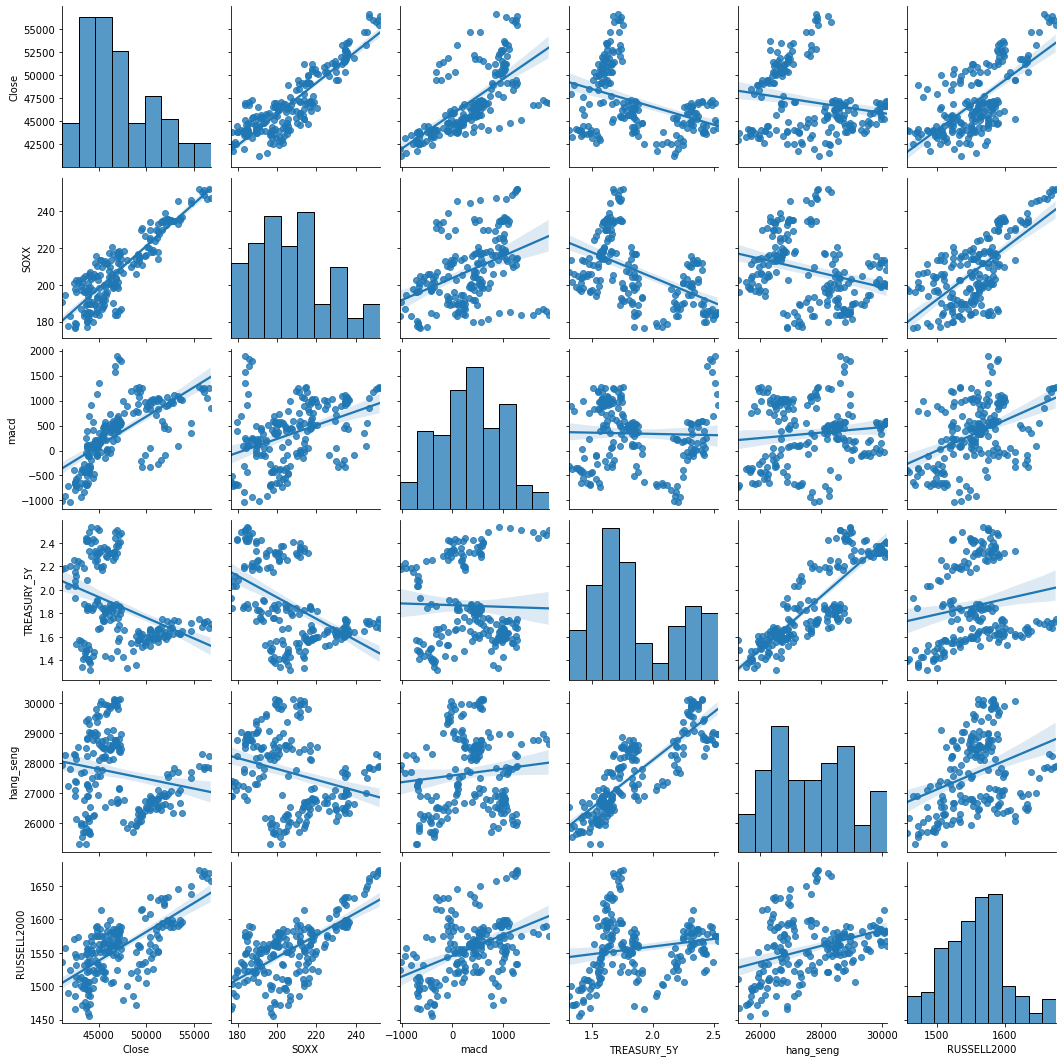

In [18]:
import seaborn as sns
#sns.pairplot(returns[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행
sns.pairplot(model_samsung[['Close', 'SOXX', 'macd', 'TREASURY_5Y','hang_seng','RUSSELL2000']], kind='reg')

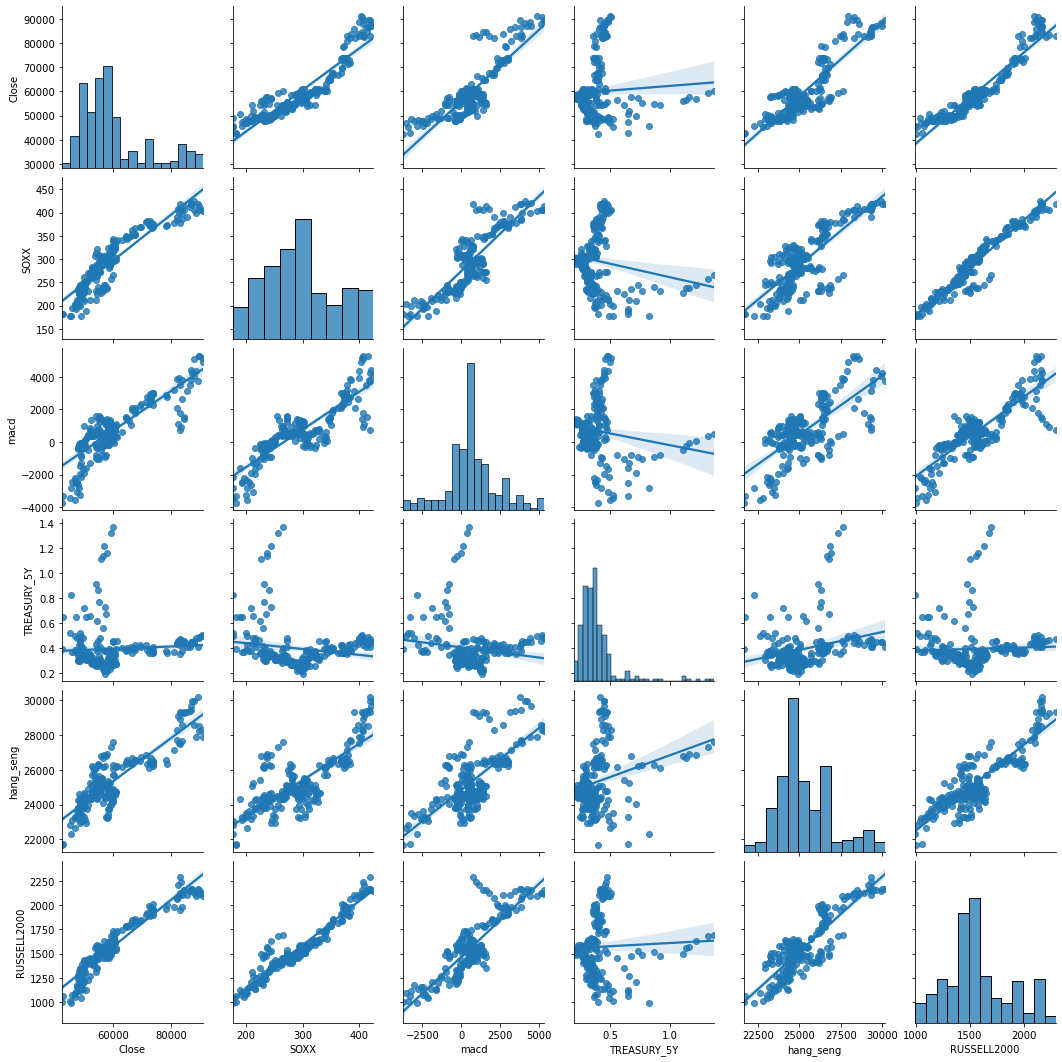

In [19]:
import seaborn as sns
#sns.pairplot(returns[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행
sns.pairplot(model_samsung_[['Close', 'SOXX', 'macd', 'TREASURY_5Y','hang_seng','RUSSELL2000']], kind='reg')

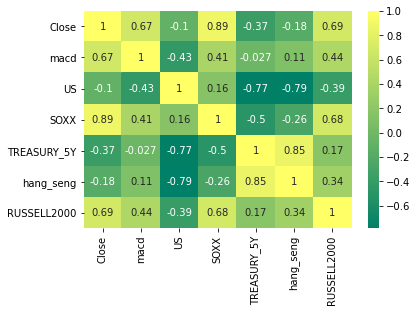

In [20]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(model_samsung.corr(), annot=True, cmap='summer')

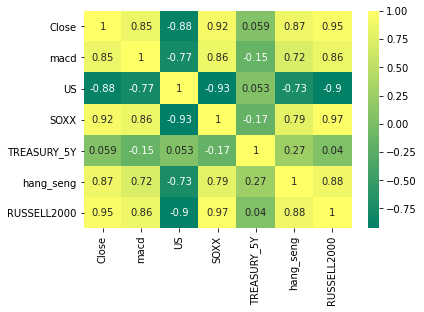

In [21]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(model_samsung_.corr(), annot=True, cmap='summer')

In [22]:
## 코로나 이후 상관관계가 높은 지수(macd,soxx,russell2000 )는 더 높은 상관관계를 보이는 것을 확인 할 수 있다.
## 그러나 환율의 경우 코로나 이후 음의 상관관계가 더 높아 지는 것을 볼 수가 있으며,
## 항생지수의 경우 코로나 전에는 큰 상관관계를 보이지 않다가 코로나 이후 높은 상관관계를 보이는 것을 확인 할 수 있다.

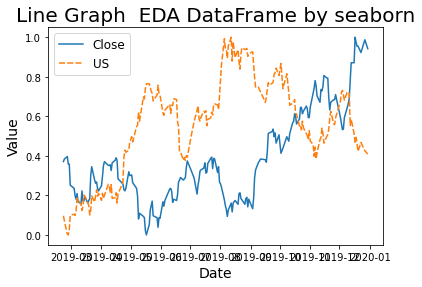

In [23]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'US']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

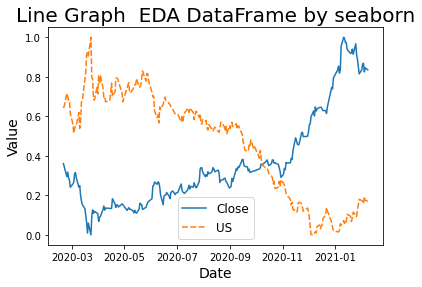

In [24]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'US']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

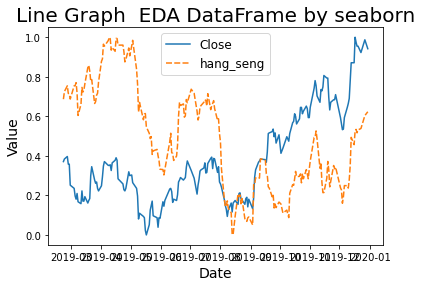

In [25]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'hang_seng']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

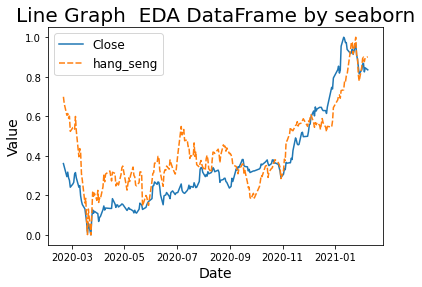

In [26]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'hang_seng']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

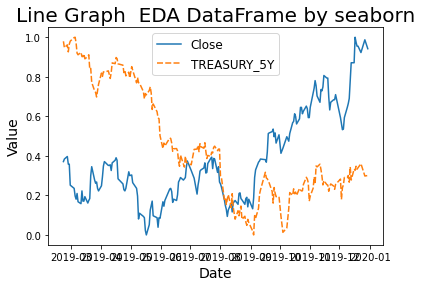

In [27]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'TREASURY_5Y']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

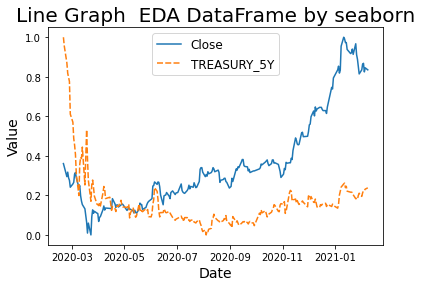

In [28]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'TREASURY_5Y']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

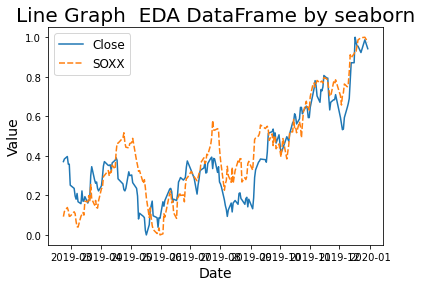

In [29]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'SOXX']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

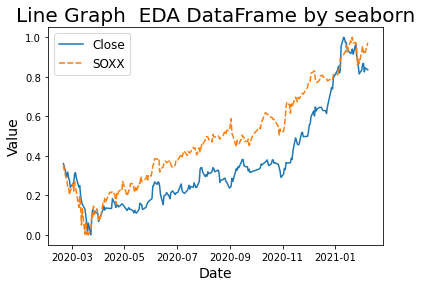

In [30]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'SOXX']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

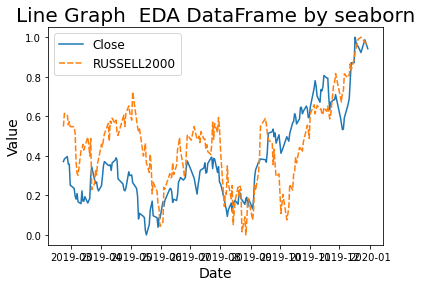

In [31]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'RUSSELL2000']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

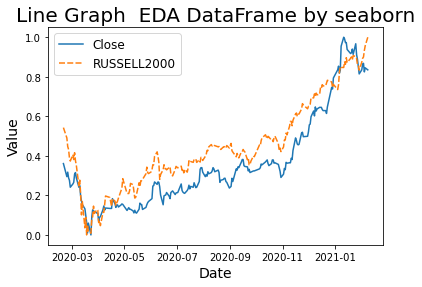

In [32]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'RUSSELL2000']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

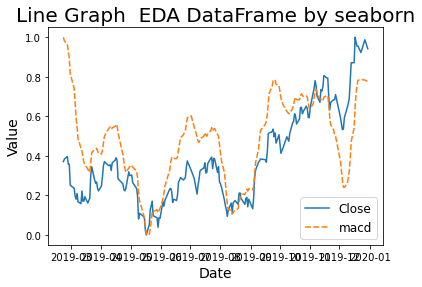

In [33]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'macd']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

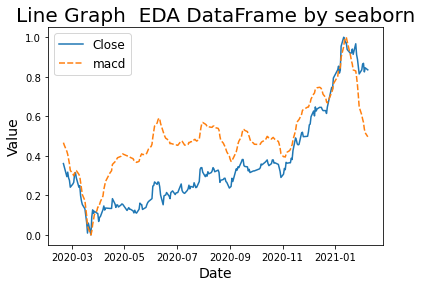

In [34]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'macd']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()